In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '../1. Data/'
WASTE_PATH = DATA_PATH+'waste.csv'

In [3]:
df = pd.read_csv('../1. Data/waste.csv', delimiter=';', decimal='.')
df['date'] = pd.to_datetime(df['date'])  # convert date column to datetime format

In [4]:
df

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
0,411.0,Extra toppings,Prepared-Edible Exc.,Barcelona,B,Article,automatic,2022-08-13 21:00:00,13.906042
1,332.0,Meat,Prepared-Edible Exc.,Barcelona,B,Ingredient,automatic,2022-12-10 20:00:00,11.592153
2,874.0,"Potato, Grains & Pasta",Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-06-03 21:00:00,26.351053
3,508.0,Sandwich,Prepared-Edible Exc.,Madrid,B,Article,manual_1,2021-07-02 21:00:00,23.008216
4,345.0,Fruit & Vegetables,Prepared-Expired,Barcelona,B,Ingredient,automatic,2021-10-21 11:00:00,18.286006
...,...,...,...,...,...,...,...,...,...
53329,67.0,"Sauces, Jams & Condiments",Prepared-Edible Exc.,Barcelona,B,Ingredient,manual_1,2021-08-21 20:00:00,31.691923
53330,604.0,Meat,Inventory Spoilage,Madrid,C,Article,manual_1,2022-08-12 15:00:00,12.820998
53331,179.0,Snacks,Prepared-Edible Exc.,Madrid,A,Ingredient,manual_1,2021-11-14 22:00:00,21.526217
53332,45.0,"Sauces, Jams & Condiments",Prepared-Edible Exc.,Madrid,A,Ingredient,manual_1,2022-03-03 22:00:00,10.216555


In [5]:
df.describe()

,item,waste
count,53334.000000,53334.000000
mean,519.890951,23.224077
std,324.852274,15.996438
min,0.000000,2.092367
25%,258.000000,12.820998
50%,498.000000,19.413342
75%,804.000000,29.383295
max,1159.000000,223.616587


In [6]:
# show timespan of data
df['date'].min(), df['date'].max()

(Timestamp('2021-02-02 08:00:00'), Timestamp('2022-12-31 18:00:00'))

## By food category analysis

<AxesSubplot:title={'center':'Total waste per food category'}, ylabel='waste'>

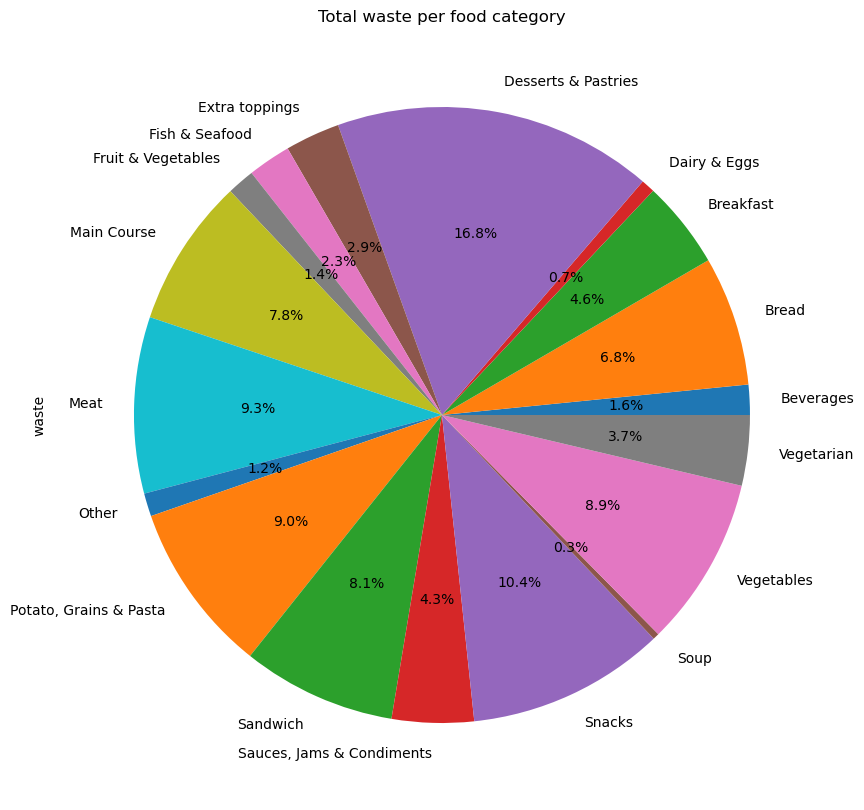

In [7]:
# total waste pie chart per food category
df.groupby('food_category').sum()['waste'].plot.pie(figsize=(10,10), autopct='%1.1f%%', title='Total waste per food category')

In [20]:
waste_by_category

food_category
Beverages                     19584.732385
Bread                         84186.096333
Breakfast                     56985.066169
Dairy & Eggs                   8899.436513
Desserts & Pastries          207857.717694
Extra toppings                35626.627888
Fish & Seafood                27947.893576
Fruit & Vegetables            17901.576195
Main Course                   96614.691341
Meat                         114609.014832
Other                         15023.923586
Potato, Grains & Pasta       111161.587677
Sandwich                     100097.499008
Sauces, Jams & Condiments     53216.465515
Snacks                       128697.525516
Soup                           4118.082263
Vegetables                   110362.277509
Vegetarian                    45742.720789
Name: waste, dtype: float64

([<matplotlib.patches.Wedge at 0x7fdadb654490>,
 [Text(1.0993883313125128, 0.03667829022580806, 'Beverages'),
  Text(1.0688032818552404, 0.26011448382484953, 'Bread'),
  Text(0.9397205449217021, 0.5717738166898336, 'Breakfast'),
  Text(0.8365524118114122, 0.7142689005497227, 'Dairy & Eggs'),
  Text(0.4436051046616053, 1.006585570688437, 'Desserts & Pastries'),
  Text(-0.063963672283707, 1.0981387201205424, 'Extra toppings'),
  Text(-0.27160024752266243, 1.0659424494528909, 'Fish & Seafood'),
  Text(-0.4695661083681137, 0.9947400011420197, 'Fruit & Vegetables'),
  Text(-0.9156106755331698, 0.609636851617168, 'Main Course'),
  Text(-1.007261719680125, -0.44206767362818716, 'Meat'),
  Text(-0.6429105851298985, -0.8925614710079816, 'Other'),
  Text(-0.3602183875675975, -1.0393472534519925, 'Potato, Grains & Pasta'),
  Text(0.11182606104688508, -1.0943011158135307, 'Sandwich'),
  Text(0.35296988116448597, -1.0418312065736604, 'Sauces, Jams & Condiments'),
  Text(0.5809044825738421, -0.93410

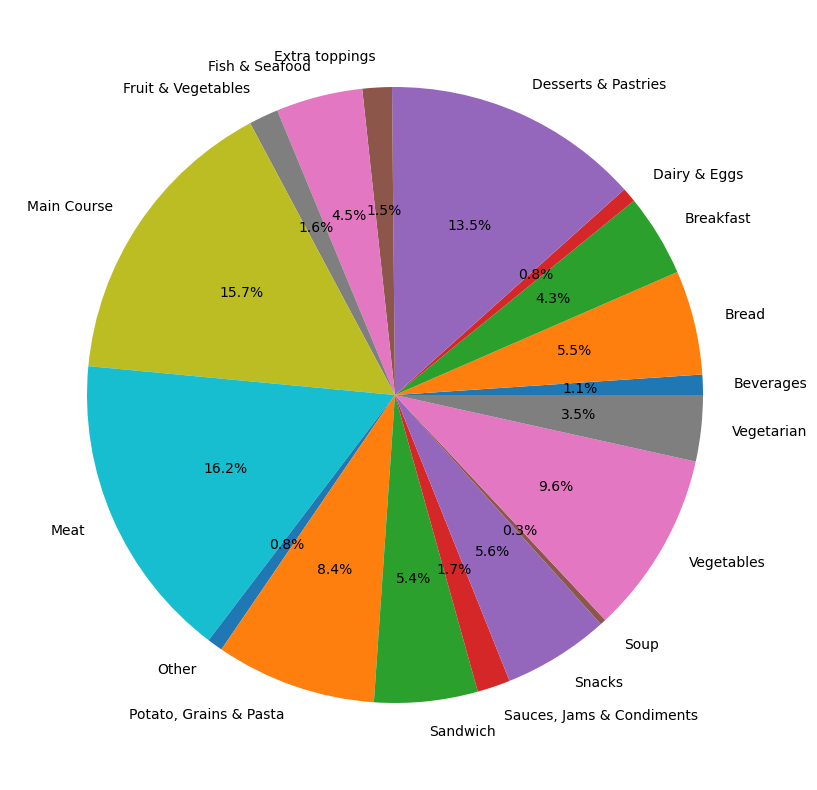

In [25]:
economic_values = np.array([0.5, 0.6, 0.7, 0.8, 0.6, 0.4, 1.5, 0.8, 1.5, 1.3, 0.5, 0.7, 0.5, 0.3, 0.4, 0.7, 0.8, 0.7])

# group data by food category and sum the waste column
waste_by_category = df.groupby('food_category')['waste'].sum()

# convert waste data to a NumPy array
waste_values = waste_by_category.values

# multiply waste values with economic values
economic_waste = waste_values * economic_values

plt.figure(figsize=(10,10))
# pie chart of economic waste per food category
plt.pie(economic_waste, labels=waste_by_category.index, autopct='%1.1f%%')

<AxesSubplot:title={'center':'Total waste per food category of each kitchen_type'}, xlabel='kitchen_type'>

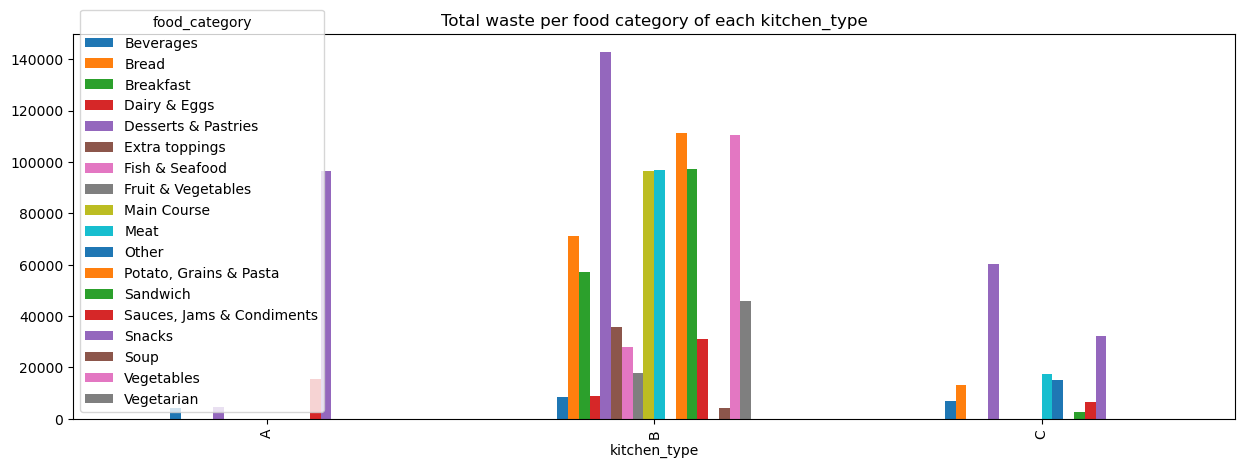

In [10]:
# bar plot of total waste per food category of each kitchen_type
df.groupby(['kitchen_type', 'food_category']).sum()['waste'].unstack().plot.bar(figsize=(15,5), title='Total waste per food category of each kitchen_type')